# 1. Load runtime table

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

index_info_df = pd.read_csv('cases/full/index-info.tsv', sep='\t')
index_info_df.loc[index_info_df['Name'] == '0810PADBR-1', 'Organism'] = 'Campylobacter jejuni'
index_info_df.loc[index_info_df['Name'] == '1405WAEXK-1', 'Organism'] = 'Escherichia coli'
index_info_df.loc[index_info_df['Name'] == '1408MLGX6-3WGS', 'Organism'] = 'Listeria monocytogenes'
index_info_df.loc[index_info_df['Name'] == '1203NYJAP-1 - Tuna Scrape Outbreak', 'Organism'] = 'Salmonella enterica'

execution_order = ['Campylobacter jejuni', 'Escherichia coli',
                  'Listeria monocytogenes', 'Salmonella enterica']

# Calculated from an empty index "gdi init" and
# "gdi db size --unit B"
empty_index_size_bytes = 208896

for idx, organism in enumerate(execution_order):
    for iteration in [1, 2, 3]:
        index_size_iteration_value = index_info_df.loc[(index_info_df['Organism'] == organism) & \
                  (index_info_df['Iteration'] == iteration), 'Index size'].tolist()[0]
            
        if idx == 0:
            index_info_df.loc[(index_info_df['Organism'] == organism) & \
                              (index_info_df['Iteration'] == iteration),
                              'Index size (organism)'] = index_size_iteration_value - 208896
        else:
            organism_prev = execution_order[idx - 1]
            index_size_iteration_value_prev = index_info_df.loc[(index_info_df['Organism'] == organism_prev) & \
                      (index_info_df['Iteration'] == iteration), 'Index size'].tolist()[0]
            
            index_info_df.loc[(index_info_df['Organism'] == organism) & \
                              (index_info_df['Iteration'] == iteration),
                              'Index size (organism)'] = index_size_iteration_value - index_size_iteration_value_prev
index_info_df

,Name,Iteration,Number samples,Number features (all),Number features (no unknown),Number cores,Reference length,Analysis runtime,Analysis memory (max),Analysis memory (max/process),...,Index memory (max),Index memory (max/process),Index size,Tree runtime,Tree memory (max),Tree memory (max/process),Total runtime,Max memory,Organism,Index size (organism)
0,0810PADBR-1,1,22,45117,1102,4,1634890,3164.56,1.500910e+10,3.427922e+09,...,2.071814e+09,6.979912e+08,46727168.0,24.00,5.445837e+08,276525056.0,3243.18,1.500910e+10,Campylobacter jejuni,46518272.0
1,1405WAEXK-1,1,9,45117,1102,4,5412686,994.01,5.358551e+09,1.683341e+09,...,3.805688e+09,3.805688e+09,134746112.0,28.95,8.188109e+08,459202560.0,1244.60,5.358551e+09,Escherichia coli,88018944.0
2,1408MLGX6-3WGS,1,31,45117,1102,4,2939733,2391.66,1.000337e+10,1.928913e+09,...,2.557604e+09,9.619333e+08,174039040.0,33.22,9.946153e+08,660717568.0,2543.26,1.000337e+10,Listeria monocytogenes,39292928.0
3,1203NYJAP-1 - Tuna Scrape Outbreak,1,23,45117,1102,4,4808805,1494.16,6.852243e+09,1.370481e+09,...,5.870498e+09,2.774364e+09,251240448.0,37.49,1.334784e+09,869670912.0,1849.95,6.852243e+09,Salmonella enterica,77201408.0
4,0810PADBR-1,2,22,45117,1102,4,1634890,3151.42,1.531215e+10,3.428192e+09,...,2.244510e+09,7.115858e+08,46723072.0,20.43,5.445059e+08,276520960.0,3228.08,1.531215e+10,Campylobacter jejuni,46514176.0
5,1405WAEXK-1,2,9,45117,1102,4,5412686,982.97,5.382439e+09,1.683649e+09,...,3.806372e+09,3.806372e+09,134230016.0,31.66,8.181187e+08,458653696.0,1241.70,5.382439e+09,Escherichia coli,87506944.0
6,1408MLGX6-3WGS,2,31,45117,1102,4,2939733,2405.54,9.751671e+09,1.928995e+09,...,2.675294e+09,1.042084e+09,173305856.0,37.04,9.947341e+08,660516864.0,2559.68,9.751671e+09,Listeria monocytogenes,39075840.0
7,1203NYJAP-1 - Tuna Scrape Outbreak,2,23,45117,1102,4,4808805,1505.96,6.610252e+09,1.370345e+09,...,6.125785e+09,2.999583e+09,248102912.0,39.43,1.335644e+09,870047744.0,1838.19,6.610252e+09,Salmonella enterica,74797056.0
8,0810PADBR-1,3,22,45117,1102,4,1634890,3137.54,1.460082e+10,3.428102e+09,...,2.265334e+09,7.472660e+08,46706688.0,21.82,5.445878e+08,276344832.0,3212.38,1.460082e+10,Campylobacter jejuni,46497792.0
9,1405WAEXK-1,3,9,45117,1102,4,5412686,991.80,5.303386e+09,1.683771e+09,...,3.806507e+09,3.806507e+09,134623232.0,29.30,8.192573e+08,459137024.0,1252.25,5.303386e+09,Escherichia coli,87916544.0


In [2]:
index_info_df.set_index(['Organism', 'Iteration'])[['Index size', 'Index size (organism)']]

,,Index size,Index size (organism)
Organism,Iteration,,
Campylobacter jejuni,1,46727168.0,46518272.0
Escherichia coli,1,134746112.0,88018944.0
Listeria monocytogenes,1,174039040.0,39292928.0
Salmonella enterica,1,251240448.0,77201408.0
Campylobacter jejuni,2,46723072.0,46514176.0
Escherichia coli,2,134230016.0,87506944.0
Listeria monocytogenes,2,173305856.0,39075840.0
Salmonella enterica,2,248102912.0,74797056.0
Campylobacter jejuni,3,46706688.0,46497792.0


# 2. Plots

## 2.1. Runtime

### 2.1.1. Common styles 

In [3]:
stages_palette = ['#1b9e77', '#7570b3', '#d95f02', '#000000']
stages_markers = ['o', 's', '^', 'X']
stages_palette_nototal = ['#1b9e77', '#7570b3', '#d95f02']
stages_markers_nototal = ['o', 's', '^']
stages_palette_notree = ['#1b9e77', '#7570b3', '#000000']
stages_markers_notree = ['o', 's', 'X']

### 2.1.2. Runtime plots

In [4]:
def melt_runtimes(df: pd.DataFrame, id_vars: str) -> pd.DataFrame:
    df = df.copy()
    df = df[~df['Tree runtime'].isna()]
    value_vars = ['Analysis runtime', 'Index runtime', 'Tree runtime', 'Total runtime']
    df = pd.melt(df, id_vars=id_vars,
            value_vars=value_vars)
    df = df.rename({'variable': 'Stage', 'value': 'Time (seconds)'}, axis='columns')
    df['Stage'] = df['Stage'].str.replace(' runtime', '', regex=False)
    df['Time (minutes)'] = df['Time (seconds)'] / 60
    df['Time (hours)'] = df['Time (seconds)'] / 3600
    
    df['Time/sample (seconds)'] = df['Time (seconds)'] / df['Number samples']
    df['Reference length (Mbp)'] = df['Reference length'] / 10**6
    
    df['Name'] = df['Name'] + "\n(" + df['Organism'] + ', ' + df['Reference length (Mbp)'].apply(lambda x: f'{x:0.1f}') + ' mbp)'
        
    return df

index_info_runtime_df = melt_runtimes(index_info_df, id_vars=['Name', 'Organism',
                                                              'Number samples', 'Reference length'])
index_info_runtime_df

,Name,Organism,Number samples,Reference length,Stage,Time (seconds),Time (minutes),Time (hours),Time/sample (seconds),Reference length (Mbp)
0,"0810PADBR-1\n(Campylobacter jejuni, 1.6 mbp)",Campylobacter jejuni,22,1634890,Analysis,3164.56,52.742667,0.879044,143.843636,1.634890
1,"1405WAEXK-1\n(Escherichia coli, 5.4 mbp)",Escherichia coli,9,5412686,Analysis,994.01,16.566833,0.276114,110.445556,5.412686
2,"1408MLGX6-3WGS\n(Listeria monocytogenes, 2.9 mbp)",Listeria monocytogenes,31,2939733,Analysis,2391.66,39.861000,0.664350,77.150323,2.939733
3,1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonell...,Salmonella enterica,23,4808805,Analysis,1494.16,24.902667,0.415044,64.963478,4.808805
4,"0810PADBR-1\n(Campylobacter jejuni, 1.6 mbp)",Campylobacter jejuni,22,1634890,Analysis,3151.42,52.523667,0.875394,143.246364,1.634890
5,"1405WAEXK-1\n(Escherichia coli, 5.4 mbp)",Escherichia coli,9,5412686,Analysis,982.97,16.382833,0.273047,109.218889,5.412686
6,"1408MLGX6-3WGS\n(Listeria monocytogenes, 2.9 mbp)",Listeria monocytogenes,31,2939733,Analysis,2405.54,40.092333,0.668206,77.598065,2.939733
7,1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonell...,Salmonella enterica,23,4808805,Analysis,1505.96,25.099333,0.418322,65.476522,4.808805
8,"0810PADBR-1\n(Campylobacter jejuni, 1.6 mbp)",Campylobacter jejuni,22,1634890,Analysis,3137.54,52.292333,0.871539,142.615455,1.634890
9,"1405WAEXK-1\n(Escherichia coli, 5.4 mbp)",Escherichia coli,9,5412686,Analysis,991.80,16.530000,0.275500,110.200000,5.412686


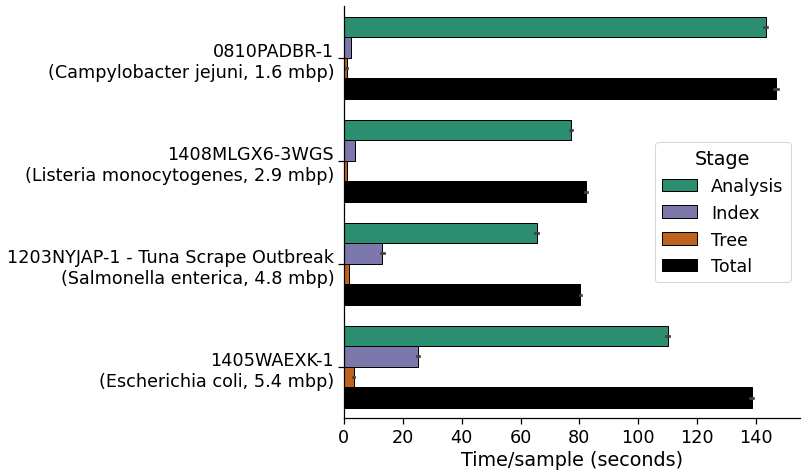

In [5]:
with sns.plotting_context("notebook", font_scale=1.6):
    cat_order = index_info_runtime_df.groupby('Name').agg('first').sort_values('Reference length').index.tolist()
    
    g = sns.catplot(y='Name', x='Time/sample (seconds)', hue="Stage", ci="sd", kind="bar",
                    data=index_info_runtime_df, edgecolor='black',
                    height=7, aspect=1.7, linewidth=1,
                    legend_out=False,
                    order=cat_order,
                    palette=stages_palette)
    g.set(ylabel=None)

    plt.savefig('figures/index-runtime.pdf')

#### 2.1.2.1. Mean/stdevs

In [6]:
index_info_runtime_df[['Name', 'Stage', 'Time/sample (seconds)']]\
 .groupby(['Name', 'Stage']).agg(['mean', 'std', 'count'])

Time/sample (seconds)  \
                                                                             mean   
Name                                               Stage                            
0810PADBR-1\n(Campylobacter jejuni, 1.6 mbp)       Analysis            143.235152   
                                                   Index                 2.482879   
                                                   Total               146.721818   
                                                   Tree                  1.003788   
1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonella... Analysis             65.474493   
                                                   Index                13.134348   
                                                   Total                80.291739   
                                                   Tree                  1.682899   
1405WAEXK-1\n(Escherichia coli, 5.4 mbp)           Analysis            109.954815   
                                                   Index                25.180000   
                                                   Total               138.464815   
                                                   Tree                  3.330000   
1408MLGX6-3WGS\n(Listeria monocytogenes, 2.9 mbp)  Analysis             77.169247   
                                                   Index                 3.794409   
                                                   Total                82.123441   
                                                   Tree                  1.159785   

                                                                             
                                                                  std count  
Name                                               Stage                     
0810PADBR-1\n(Campylobacter jejuni, 1.6 mbp)       Analysis  0.614168     3  
                                                   Index     0.072955     3  
                                                   Total     0.700044     3  
                                                   Tree      0.081796     3  
1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonella... Analysis  0.510003     3  
                                                   Index     0.612530     3  
                                                   Total     0.323857     3  
                                                   Tree      0.046084     3  
1405WAEXK-1\n(Escherichia coli, 5.4 mbp)           Analysis  0.649049     3  
                                                   Index     0.530105     3  
                                                   Total     0.605590     3  
                                                   Tree      0.163779     3  
1408MLGX6-3WGS\n(Listeria monocytogenes, 2.9 mbp)  Analysis  0.419675     3  
                                                   Index     0.021594     3  
                                                   Total     0.411775     3  
                                                   Tree      0.076892     3

## 2.2. Memory plots

In [7]:
def melt_memory(df: pd.DataFrame, id_vars: str) -> pd.DataFrame:
    df = df[~df['Tree memory (max)'].isna()]
    value_vars = ['Analysis memory (max)', 'Index memory (max)', 'Tree memory (max)']

    df = pd.melt(df, id_vars=id_vars,
            value_vars=value_vars)
    df['value'] = df['value'].apply(lambda x: x/(1024**2))
    df = df.rename({'variable': 'Stage', 'value': 'Peak Memory (MB)'}, axis='columns')
    df['Stage'] = df['Stage'].str.replace(' memory (max)', '', regex=False)
    
    df['Peak Memory/sample (MB)'] = df['Peak Memory (MB)'] / df['Number samples']
    
    df['Reference length (Mbp)'] = df['Reference length'] / 10**6
    
    df['Name'] = df['Name'] + "\n(" + df['Organism'] + ', ' + df['Reference length (Mbp)'].apply(lambda x: f'{x:0.1f}') + ' mbp)'
    
    return df

index_info_memory_df = melt_memory(index_info_df, id_vars=['Name', 'Organism',
                                                            'Number samples', 'Reference length'])
index_info_memory_df

,Name,Organism,Number samples,Reference length,Stage,Peak Memory (MB),Peak Memory/sample (MB),Reference length (Mbp)
0,"0810PADBR-1\n(Campylobacter jejuni, 1.6 mbp)",Campylobacter jejuni,22,1634890,Analysis,14313.792969,650.626953,1.634890
1,"1405WAEXK-1\n(Escherichia coli, 5.4 mbp)",Escherichia coli,9,5412686,Analysis,5110.312500,567.812500,5.412686
2,"1408MLGX6-3WGS\n(Listeria monocytogenes, 2.9 mbp)",Listeria monocytogenes,31,2939733,Analysis,9539.957031,307.740549,2.939733
3,1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonell...,Salmonella enterica,23,4808805,Analysis,6534.808594,284.122113,4.808805
4,"0810PADBR-1\n(Campylobacter jejuni, 1.6 mbp)",Campylobacter jejuni,22,1634890,Analysis,14602.804688,663.763849,1.634890
5,"1405WAEXK-1\n(Escherichia coli, 5.4 mbp)",Escherichia coli,9,5412686,Analysis,5133.093750,570.343750,5.412686
6,"1408MLGX6-3WGS\n(Listeria monocytogenes, 2.9 mbp)",Listeria monocytogenes,31,2939733,Analysis,9299.917969,299.997354,2.939733
7,1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonell...,Salmonella enterica,23,4808805,Analysis,6304.027344,274.088145,4.808805
8,"0810PADBR-1\n(Campylobacter jejuni, 1.6 mbp)",Campylobacter jejuni,22,1634890,Analysis,13924.425781,632.928445,1.634890
9,"1405WAEXK-1\n(Escherichia coli, 5.4 mbp)",Escherichia coli,9,5412686,Analysis,5057.703125,561.967014,5.412686


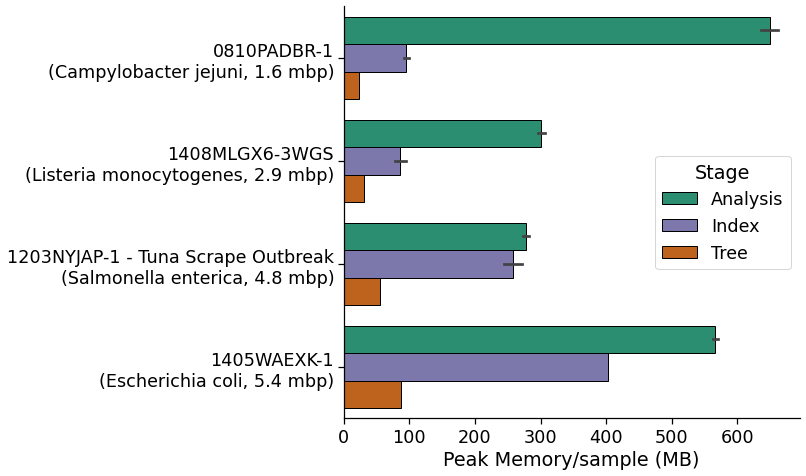

In [16]:
with sns.plotting_context("notebook", font_scale=1.6):
    cat_order = index_info_memory_df.groupby('Name').agg('first').sort_values('Reference length').index.tolist()
    
    g = sns.catplot(y='Name', x='Peak Memory/sample (MB)', hue="Stage", ci="sd", kind="bar",
                    data=index_info_memory_df, edgecolor='black',
                    height=7, aspect=1.7, linewidth=1,
                    legend_out=False,
                    order=cat_order,
                    palette=stages_palette)
    g.set(ylabel=None)

    plt.savefig('figures/index-memory.pdf')

### 2.2.1. Mean/stddev

In [9]:
index_info_memory_df[['Name', 'Stage', 'Peak Memory/sample (MB)']]\
 .groupby(['Name', 'Stage']).agg(['mean', 'std', 'count'])

Peak Memory/sample (MB)  \
                                                                               mean   
Name                                               Stage                              
0810PADBR-1\n(Campylobacter jejuni, 1.6 mbp)       Analysis              649.106416   
                                                   Index                  95.102391   
                                                   Tree                   23.606001   
1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonella... Analysis              278.179121   
                                                   Index                 257.657722   
                                                   Tree                   55.382756   
1405WAEXK-1\n(Escherichia coli, 5.4 mbp)           Analysis              566.707755   
                                                   Index                 403.318287   
                                                   Tree                   86.755642   
1408MLGX6-3WGS\n(Listeria monocytogenes, 2.9 mbp)  Analysis              301.371052   
                                                   Index                  86.297883   
                                                   Tree                   30.593414   

                                                                              
                                                                   std count  
Name                                               Stage                      
0810PADBR-1\n(Campylobacter jejuni, 1.6 mbp)       Analysis  15.473835     3  
                                                   Index      4.604891     3  
                                                   Tree       0.002001     3  
1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonella... Analysis   5.267124     3  
                                                   Index     16.380756     3  
                                                   Tree       0.037895     3  
1405WAEXK-1\n(Escherichia coli, 5.4 mbp)           Analysis   4.296251     3  
                                                   Index      0.046537     3  
                                                   Tree       0.060796     3  
1408MLGX6-3WGS\n(Listeria monocytogenes, 2.9 mbp)  Analysis   5.805840     3  
                                                   Index     10.218377     3  
                                                   Tree       0.011316     3

## 2.3. Disk usage plots

In [10]:
def melt_disk_usage(df: pd.DataFrame, id_vars: str) -> pd.DataFrame:
    df = df.copy()
    df['Index size'] = df['Index size (organism)']
    
    df['Total size'] = df['Analysis disk uage'] + df['Index size']
    df = pd.melt(df, id_vars=id_vars,
            value_vars=['Analysis disk uage', 'Index size'])
    df['value'] = df['value'].apply(lambda x: x/(1024**2))
    df = df.rename({'variable': 'Stage', 'value': 'Disk (MB)'}, axis='columns')
    df['Stage'] = df['Stage'].str.replace(' disk uage', '', regex=False)
    df['Stage'] = df['Stage'].str.replace(' size', '', regex=False)
    
    df['Disk/sample (MB)'] = df['Disk (MB)'] / df['Number samples']
    df['Reference length (Mbp)'] = df['Reference length'] / 10**6
    
    df['Name'] = df['Name'] + "\n(" + df['Organism'] + ', ' + df['Reference length (Mbp)'].apply(lambda x: f'{x:0.1f}') + ' mbp)'
    
    return df
index_info_disk_df = melt_disk_usage(index_info_df, id_vars=['Name', 'Organism',
                                                              'Number samples', 'Reference length'])
index_info_disk_df

,Name,Organism,Number samples,Reference length,Stage,Disk (MB),Disk/sample (MB),Reference length (Mbp)
0,"0810PADBR-1\n(Campylobacter jejuni, 1.6 mbp)",Campylobacter jejuni,22,1634890,Analysis,11455.867188,520.721236,1.634890
1,"1405WAEXK-1\n(Escherichia coli, 5.4 mbp)",Escherichia coli,9,5412686,Analysis,6260.304688,695.589410,5.412686
2,"1408MLGX6-3WGS\n(Listeria monocytogenes, 2.9 mbp)",Listeria monocytogenes,31,2939733,Analysis,10315.359375,332.753528,2.939733
3,1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonell...,Salmonella enterica,23,4808805,Analysis,8607.515625,374.239810,4.808805
4,"0810PADBR-1\n(Campylobacter jejuni, 1.6 mbp)",Campylobacter jejuni,22,1634890,Analysis,11455.875000,520.721591,1.634890
5,"1405WAEXK-1\n(Escherichia coli, 5.4 mbp)",Escherichia coli,9,5412686,Analysis,6260.316406,695.590712,5.412686
6,"1408MLGX6-3WGS\n(Listeria monocytogenes, 2.9 mbp)",Listeria monocytogenes,31,2939733,Analysis,10315.421875,332.755544,2.939733
7,1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonell...,Salmonella enterica,23,4808805,Analysis,8607.480469,374.238281,4.808805
8,"0810PADBR-1\n(Campylobacter jejuni, 1.6 mbp)",Campylobacter jejuni,22,1634890,Analysis,11455.859375,520.720881,1.634890
9,"1405WAEXK-1\n(Escherichia coli, 5.4 mbp)",Escherichia coli,9,5412686,Analysis,6260.308594,695.589844,5.412686


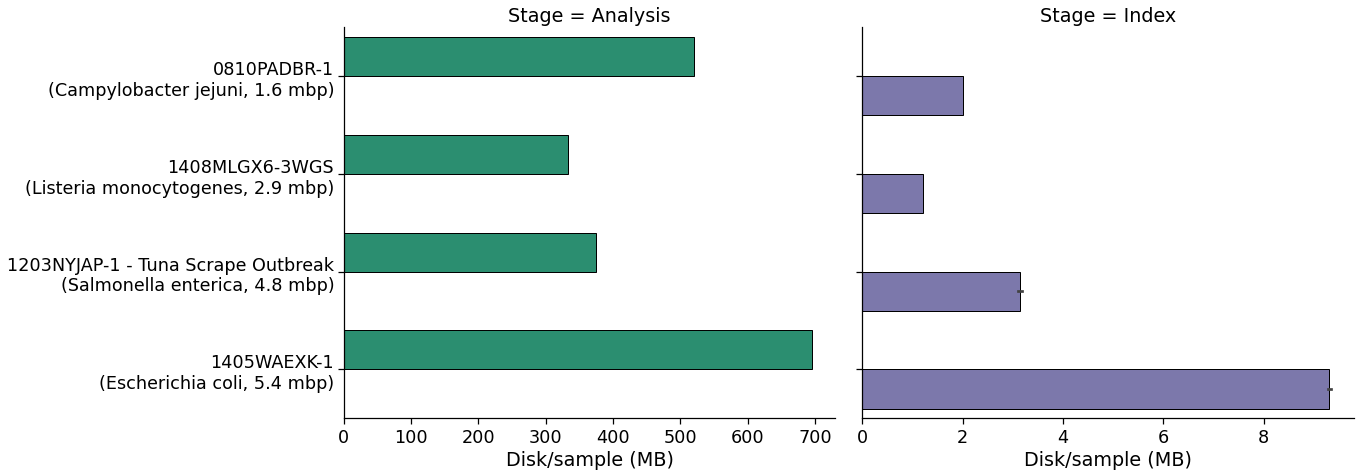

In [11]:
with sns.plotting_context("notebook", font_scale=1.6):
    cat_order = index_info_disk_df.groupby('Name').agg('first').sort_values('Reference length').index.tolist()
    
    g = sns.catplot(y='Name', x='Disk/sample (MB)', col="Stage", hue="Stage", ci="sd", kind="bar",
                    data=index_info_disk_df, edgecolor='black',
                    height=7, aspect=1.4, linewidth=1,
                    legend_out=False,
                    order=cat_order,
                    palette=stages_palette,
                    sharex=False)
    g.set(ylabel=None)

    plt.savefig('figures/index-disk.pdf')

### 2.3.1. Mean/stddev

In [12]:
index_info_disk_df[['Name', 'Stage', 'Disk/sample (MB)']]\
 .groupby(['Name', 'Stage']).agg(['mean', 'std', 'count'])

Disk/sample (MB)  \
                                                                        mean   
Name                                               Stage                       
0810PADBR-1\n(Campylobacter jejuni, 1.6 mbp)       Analysis       520.721236   
                                                   Index            2.016158   
1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonella... Analysis       374.239470   
                                                   Index            3.150306   
1405WAEXK-1\n(Escherichia coli, 5.4 mbp)           Analysis       695.589988   
                                                   Index            9.305122   
1408MLGX6-3WGS\n(Listeria monocytogenes, 2.9 mbp)  Analysis       332.754830   
                                                   Index            1.207787   

                                                                             
                                                                  std count  
Name                                               Stage                     
0810PADBR-1\n(Campylobacter jejuni, 1.6 mbp)       Analysis  0.000355     3  
                                                   Index     0.000470     3  
1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonella... Analysis  0.001061     3  
                                                   Index     0.049873     3  
1405WAEXK-1\n(Escherichia coli, 5.4 mbp)           Analysis  0.000663     3  
                                                   Index     0.028708     3  
1408MLGX6-3WGS\n(Listeria monocytogenes, 2.9 mbp)  Analysis  0.001129     3  
                                                   Index     0.005240     3